# DATA VISUALIZATION WITH PANDAS
## DATA EXTRACTION AND CLEANING
1. SETTING ENVIRONMENT AND LIBRARIES

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from scipy.stats.mstats import winsorize
%matplotlib inline

## ACCESSING THE DATA USING PANDAS

In [53]:
df = pd.read_csv("/Users/boryabaghir/Downloads/coursea_data.csv", index_col=0)
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


# DATA CLEANING
1. Checking for missing values
2. Checking for duplicated values
3. Checking for outliers

### 1. Checking for Missing Values

In [54]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


### 2. Checking for Duplicates

In [55]:
print(f'The data frame contains {df.duplicated().sum()} duplicates')

The data frame contains 0 duplicates


### 3. Checking for Outliers
1. Handling data type for enrollment numbers
2. Viusalization of outliers
3. Handling Outliers

### for this part of the dataset I changed values with K(thousands) and M(millions) to a float number and stored them in the dataframe.

In [56]:
df['course_students_enrolled'] = df['course_students_enrolled'].replace({'k': 'e3', 'm': 'e6'}, regex=True).astype(float)
df['course_students_enrolled']

134      5300.0
743     17000.0
874    130000.0
413     91000.0
635    320000.0
         ...   
236     52000.0
883     21000.0
545     30000.0
875      9800.0
163     38000.0
Name: course_students_enrolled, Length: 891, dtype: float64

# Outliers Visualization
### To visualize the data the plt.boxplot used and this graph shows us how the data itself skewed from the average.

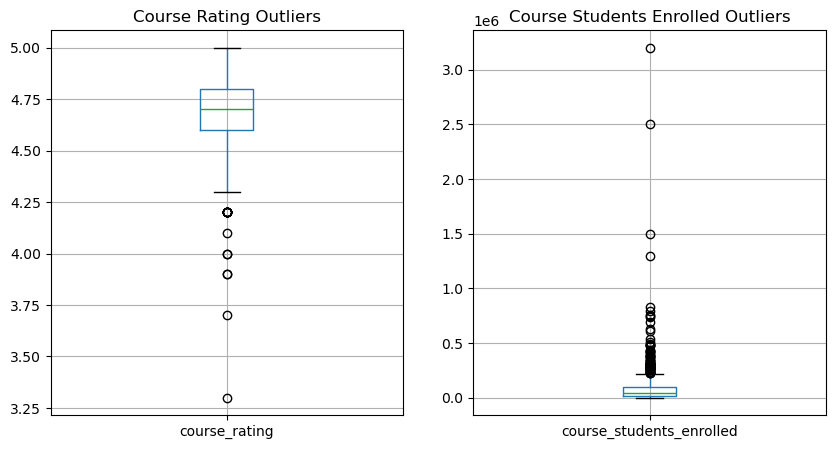

In [57]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df.boxplot(column='course_rating')
plt.title('Course Rating Outliers')
plt.subplot(1, 2, 2)
df.boxplot(column='course_students_enrolled')
plt.title('Course Students Enrolled Outliers')
plt.show()

> COURSE RATING OUTLIERS - The Graph illustrates that the average rating for courses are around 4.6 and 4.8 within the dataset and there some outliers with rating of below 4.2
> COURSE ENROLLMENT OUTLIERS - For the course enrollments the average enrollment with more K(thousands) and some courses has enrollment of m(millions)
 

In [58]:
df.describe()


,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [59]:
# Winsorize the enrollments column at 95th percentile
df['winsorized_enrollments'] = winsorize(df['course_students_enrolled'], limits=[0, 0.05])
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,winsorized_enrollments
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,5300.0
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,17000.0
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,130000.0
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,91000.0
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,310000.0
...,...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000.0,52000.0
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000.0,21000.0
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000.0,30000.0
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800.0,9800.0


### Outlier handling
* I choose winsorize as the courses that have millions of enrollers is a positive outcome rather than negative  and in the course rating  just to minimize their affect to statistical analysis and considered keeping the only outlier for course rating as it is.

# EDA Analysis of the coursera dataset using visualizations
### The top 20 organizations by course count

### Here we are looking for the organizations that have the highest number of courses

In [60]:
top_orgs = df['course_organization'].value_counts().nlargest(20).reset_index()
top_orgs.columns = ['course_organization', 'count']

#barplot
fig = px.bar(top_orgs, x='course_organization', y='count', title="20 Top Organizations by Highest Number of Courses")
fig.update_layout(
    xaxis_title="Course Organization",
    yaxis_title="Number of Courses",
    xaxis_tickangle=-45,
    width=1000,    # Increase width
    height=800     # Increase height
)
fig.show()



### Here We are looking for the organizations with the highest average rating and highest number of courses

In [61]:
org_avg_ratings = df.groupby('course_organization').agg(
    avg_rating=('course_rating', 'mean'),
    num_courses=('course_title', 'count')
).reset_index()

top_orgs_by_courses = org_avg_ratings.sort_values(by='num_courses', ascending=False).head(20)
top_orgs_by_courses = top_orgs_by_courses.sort_values(by='avg_rating', ascending=True)

fig = px.bar(
    top_orgs_by_courses,
    x='avg_rating', 
    y='course_organization', 
    title="Top 20 Organizations by Highest Average Course Rating and highest number of courses",
    hover_data={'num_courses': True}  # Show number of courses on hover
)

fig.update_layout(
    xaxis_title="Average Course Rating",
    yaxis_title="Course Organization",
    width=1000,
    height=800
)

# Display the plot
fig.show()


### The same logic applies here for finding the lowest rating courses with number of courses

In [62]:
org_avg_ratings = df.groupby('course_organization').agg(
    avg_rating=('course_rating', 'mean'),
    num_courses=('course_title', 'count')
).reset_index()

low_rating_orgs = org_avg_ratings.sort_values(by='avg_rating', ascending=True).head(20)

fig = px.bar(
    low_rating_orgs, 
    x='avg_rating', 
    y='course_organization', 
    title="Top 20 Organizations by Lowest average Course Rating and highest number of courses",
    hover_data={'num_courses': True}  # Show course title on hover
)

fig.update_layout(
    xaxis_title="Average Course Rating",
    yaxis_title="Course Organization",
    width=1000,    # Increase width
    height=800     # Increase height
)

fig.show()

### The below donut chart is responsive and in hover it provides information about the average rating per certification type

### Certification Type and Course Enrollments

In [63]:
certification_data = df.groupby('course_Certificate_type').agg( 
    num_of_students=('course_students_enrolled', 'sum'),
    avg_rating=('course_rating', 'mean')
).reset_index() # Group by certification type, calculating both total enrollments and average ratings


fig = px.pie(
    certification_data, 
    names='course_Certificate_type', 
    values='num_of_students', 
    title="Enrollment Distribution by Certification Type", 
    hole=0.4  # hole=0.4 makes it a donut
)

# Customize hover text to include average rating
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Total Enrollments: %{value}<br>Average Rating: %{customdata[0]:.2f}",
    customdata=certification_data[['avg_rating']]  # Pass average rating as custom data
)

fig.show()

In [64]:
segmented_data = df.groupby(['course_Certificate_type', 'course_difficulty']).agg(
    num_of_students=('course_students_enrolled', 'sum')
).reset_index()

fig = px.bar(
    segmented_data, 
    x='course_Certificate_type', 
    y='num_of_students', 
    color='course_difficulty',  
    title="Total Enrollments by Certification Type and Course Difficulty",
    labels={'num_of_students': 'Number of Students Enrolled', 'course_Certificate_type': 'Certification Type'}
)

fig.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    width=1000,       # Adjust width if needed
    height=600        # Adjust height if needed
)

fig.show()


> The goal here is to find out which are those courses with lowest rating and belong to which universities. But to understand why they are with low score further analysis needed.

### Encoding the course difficulty for correllation analysis
> Correllation is possible between numeric values thus we need encode course difficult to get correllation scores if the course difficulty causing the course rating and enrollments somehow.

In [65]:
def encode_difficulty(difficulty):
    if difficulty == 'Beginner':
        return 1
    elif difficulty == 'Intermediate':
        return 2
    elif difficulty == 'Mixed':
        return 3
    elif difficulty == 'Advanced':
        return 4
    else:
        return None  # Handle unexpected values

df['course_difficulty_encoded'] = df['course_difficulty'].apply(encode_difficulty)

df


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,winsorized_enrollments,course_difficulty_encoded
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,5300.0,1
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,17000.0,2
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,130000.0,3
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,91000.0,3
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,310000.0,3
...,...,...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000.0,52000.0,2
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000.0,21000.0,3
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000.0,30000.0,2
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800.0,9800.0,2


### Visualization of correllation matrix

In [66]:
correlation_matrix = df[['course_rating', 'winsorized_enrollments', 'course_difficulty_encoded']].corr()
heatmap_fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='Viridis',
        zmin=-1,
        zmax=1
    )
)

# Update layout for better visualization
heatmap_fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=600,
    height=600
)

# Display the heatmap
heatmap_fig.show()


> Based on correlation matrix there is no significant correllation between determinants. correllation score > 0.7 shows a positive correllation while <0.5 showing low correllation.

### Suggestions for the improvement

> The dataset has limited capability to further analyse the situation thus the explonatory analsyis conducted to find main points of dataset to get related with the situation.